In [6]:
import os
import pandas as pd
import numpy as np
base_path = '/bigstore/binfo/mouse/Brain/Sequencing/Allen_10X_SmartSeqTypes/'
validation_genes = np.array(pd.read_csv(os.path.join(base_path,'merfish_final_genes.csv'),header=None,index_col=0).index)
dredfish_genes = np.array(pd.read_csv(os.path.join(base_path,'dredfish_filtered_genes.csv'),header=None,index_col=0).index)
dredfish_loadings= np.load(os.path.join(base_path,'mu_50_dpnmf_loadings.npy'))

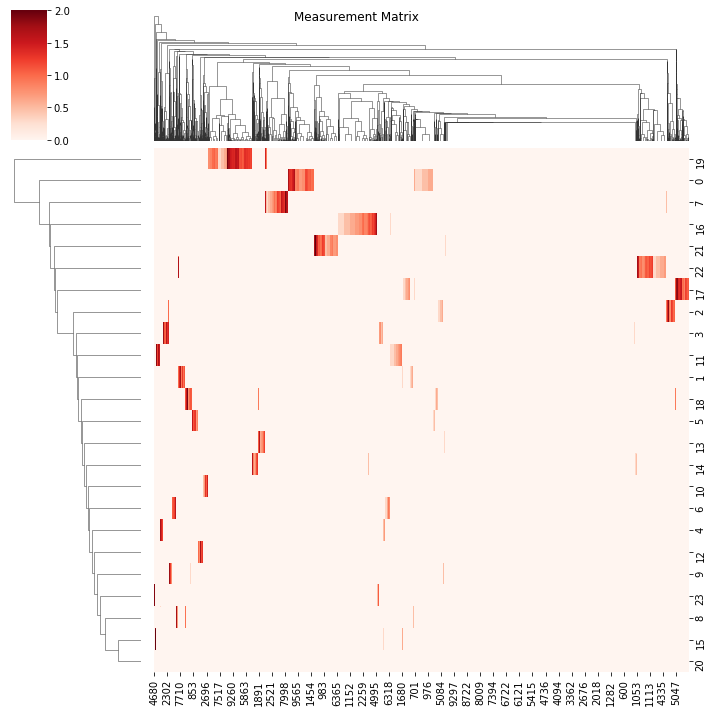

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(10000)
probes = 100*dredfish_loadings/np.max(dredfish_loadings,axis=1)[:,None]
probes = probes.astype(int)
g = sns.clustermap(np.log10(probes+1),cmap="Reds")
g.fig.suptitle('Measurement Matrix')
g
plt.show()

In [120]:
print(np.sum(np.max(probes,axis=0)>0))

6143


In [7]:
print(np.sum(np.max(dredfish_loadings,axis=0)>0))
non_zero_genes = dredfish_genes[np.max(dredfish_loadings,axis=0)>0]

6855


In [79]:
from Bio import SeqIO
fasta_sequences = SeqIO.parse(open('/home/zach/Downloads/Mus_musculus.GRCm38.cdna.all.fa'),'fasta')
sequences_ensemble_new = []
from tqdm import tqdm
for fasta in tqdm(fasta_sequences):
    sequences_ensemble_new.append(pd.DataFrame([str(fasta.description.split('gene_symbol:')[1].split(' ')[0]),
                                          str(fasta.name),
                                          str(fasta.id),
                                          str(fasta.description),
                                          len(str(fasta.seq)),
                                          str(fasta.seq)],
                            index=['Gene name','name','id','description','length','sequence']).T)
sequences_ensemble_new = pd.concat(sequences_ensemble_new,ignore_index=True)
sequences_ensemble_new.head()

119414it [02:07, 940.07it/s]


,Gene name,name,id,description,length,sequence
0,Trdd2,ENSMUST00000177564.1,ENSMUST00000177564.1,ENSMUST00000177564.1 cdna chromosome:GRCm38:14...,16,ATCGGAGGGATACGAG
1,Trdd1,ENSMUST00000196221.1,ENSMUST00000196221.1,ENSMUST00000196221.1 cdna chromosome:GRCm38:14...,9,ATGGCATAT
2,Trdd1,ENSMUST00000179664.1,ENSMUST00000179664.1,ENSMUST00000179664.1 cdna chromosome:GRCm38:14...,11,ATGGCATATCA
3,Trbd1,ENSMUST00000178537.1,ENSMUST00000178537.1,ENSMUST00000178537.1 cdna chromosome:GRCm38:6:...,12,GGGACAGGGGGC
4,Trbd2,ENSMUST00000178862.1,ENSMUST00000178862.1,ENSMUST00000178862.1 cdna chromosome:GRCm38:6:...,14,GGGACTGGGGGGGC


In [81]:
np.sum(np.isin(sequences_ensemble_new['Gene name'].unique(),non_zero_genes))

6426

In [80]:
from Bio import SeqIO
fasta_sequences = SeqIO.parse(open('/home/zach/Downloads/mouse.1.rna.fna'),'fasta')
sequences_refseq = []
from tqdm import tqdm
for fasta in tqdm(fasta_sequences):
    sequences_refseq.append(pd.DataFrame([str(fasta.description).split('(')[1].split(')')[0],str(fasta.name),str(fasta.id),str(fasta.description),len(str(fasta.seq)),str(fasta.seq)],index=['Gene name','name','id','description','length','sequence']).T)
sequences_refseq = pd.concat(sequences_refseq,ignore_index=True)
sequences_refseq.head()

57104it [01:01, 922.07it/s]


,Gene name,name,id,description,length,sequence
0,Rn45s,NR_046233.2,NR_046233.2,NR_046233.2 Mus musculus 45S pre-ribosomal RNA...,13400,ACTGACACGCTGTCCTTTCCCTATTAACACTAAAGGACACTATAAA...
1,Rn28s1,NR_003279.1,NR_003279.1,NR_003279.1 Mus musculus 28S ribosomal RNA (Rn...,4730,CGCGACCTCAGATCAGACGTGGCGACCCGCTGAATTTAAGCATATT...
2,Rs5-8s1,NR_003280.2,NR_003280.2,NR_003280.2 Mus musculus 5.8S ribosomal RNA (R...,157,GACTCTTAGCGGTGGATCACTCGGCTCGTGCGTCGATGAAGAACGC...
3,Vmn2r123,NM_009485.1,NM_009485.1,"NM_009485.1 Mus musculus vomeronasal 2, recept...",3045,GTTTTTCTGCATCAGAAACGGATTTCACAGCAGCTCCATCTCAGAT...
4,G530011O06Rik,NR_137283.1,NR_137283.1,NR_137283.1 Mus musculus RIKEN cDNA G530011O06...,2414,TTCTGCTTTCCCCTAACCAGGCTCCTGGGCTCAGCGCTCTGCAATC...


In [17]:
len(non_zero_genes)

6855

In [19]:
np.sum(np.isin(sequences_refseq['Gene name'].unique(),non_zero_genes))

4446

In [22]:
from Bio import SeqIO
resource_path = '/bigstore/binfo/mouse/'
fasta_sequences = SeqIO.parse(open(os.path.join(resource_path,'mer_transcripts.fa')),'fasta')
sequences_ensemble = []
from tqdm import tqdm
for fasta in tqdm(fasta_sequences):
    sequences_ensemble.append(pd.DataFrame([str(fasta.description).split('=')[-1],str(fasta.name),str(fasta.id),str(fasta.description),len(str(fasta.seq)),str(fasta.seq)],index=['Gene name','name','id','description','length','sequence']).T)
sequences_ensemble = pd.concat(sequences_ensemble,ignore_index=True)
sequences_ensemble.head()

125570it [02:10, 961.55it/s]


,Gene name,name,id,description,length,sequence
0,4933401J01Rik,ENSMUST00000193812,ENSMUST00000193812,ENSMUST00000193812 gene=4933401J01Rik,1070,AAGGAAAGAGGATAACACTTGAAATGTAAATAAAGAAAATACCTAA...
1,Gm26206,ENSMUST00000082908,ENSMUST00000082908,ENSMUST00000082908 gene=Gm26206,110,GTGCTTGCTTCGGCAACACATACACTAAATTTTGAACGATACAGAG...
2,Xkr4,ENSMUST00000162897,ENSMUST00000162897,ENSMUST00000162897 gene=Xkr4,4153,GCACACTACGGTCCATCTCCAACAACCGCAGTGTTGCCAGTGACCG...
3,Xkr4,ENSMUST00000159265,ENSMUST00000159265,ENSMUST00000159265 gene=Xkr4,2989,TTAGTTAAGAGCACTGACTGCTCTTGCAAAGGACCCAGGCTTGAGT...
4,Xkr4,ENSMUST00000070533,ENSMUST00000070533,ENSMUST00000070533 gene=Xkr4,3634,GCGGCGGCGGGCGAGCGGGCGCTGGAGTAGGAGCTGGGGAGCGGCG...


In [23]:
print(len(non_zero_genes))
print(np.sum(np.isin(sequences_ensemble['Gene name'].unique(),non_zero_genes)))

6855
6725


In [29]:
annotations_ensemble = pd.read_csv('/home/zach/Downloads/mouse_ensembl_annotations.csv')
annotations_ensemble.head()

,Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version,Transcript support level (TSL),Gene name,Gene % GC content,Transcript type,Transcript length (including UTRs and CDS),GENCODE basic annotation,RefSeq mRNA ID,NCBI gene (formerly Entrezgene) ID,Gene description
0,ENSMUSG00000064336,ENSMUSG00000064336.1,ENSMUST00000082387,ENSMUST00000082387.1,tslNA,mt-Tf,30.88,Mt_tRNA,68,GENCODE basic,NaN,NaN,mitochondrially encoded tRNA phenylalanine [So...
1,ENSMUSG00000064337,ENSMUSG00000064337.1,ENSMUST00000082388,ENSMUST00000082388.1,tslNA,mt-Rnr1,35.81,Mt_rRNA,955,GENCODE basic,NaN,NaN,mitochondrially encoded 12S rRNA [Source:MGI S...
2,ENSMUSG00000064338,ENSMUSG00000064338.1,ENSMUST00000082389,ENSMUST00000082389.1,tslNA,mt-Tv,39.13,Mt_tRNA,69,GENCODE basic,NaN,NaN,mitochondrially encoded tRNA valine [Source:MG...
3,ENSMUSG00000064339,ENSMUSG00000064339.1,ENSMUST00000082390,ENSMUST00000082390.1,tslNA,mt-Rnr2,35.40,Mt_rRNA,1582,GENCODE basic,NaN,NaN,mitochondrially encoded 16S rRNA [Source:MGI S...
4,ENSMUSG00000064340,ENSMUSG00000064340.1,ENSMUST00000082391,ENSMUST00000082391.1,tslNA,mt-Tl1,44.00,Mt_tRNA,75,GENCODE basic,NaN,NaN,mitochondrially encoded tRNA leucine 1 [Source...


In [59]:
filtered_sequences_ensemble = sequences_ensemble[np.isin(sequences_ensemble['Gene name'],non_zero_genes)]
filtered_sequences_ensemble

,Gene name,name,id,description,length,sequence
9,Gm1992,ENSMUST00000161581,ENSMUST00000161581,ENSMUST00000161581 gene=Gm1992,250,TGAAAATGGATAGCAGTTCCCTTAATCTTCTTGTACTTATGGGAGG...
25,Sox17,ENSMUST00000027035,ENSMUST00000027035,ENSMUST00000027035 gene=Sox17,3127,CCCATTTAGTGAAGAAACTGAAATATGGCCCACTCACACTGCTGGC...
26,Sox17,ENSMUST00000195555,ENSMUST00000195555,ENSMUST00000195555 gene=Sox17,1977,CCAGTTGATCACCAACCCGCTTGCTACAGGCCCCAAATGGTTACGG...
27,Sox17,ENSMUST00000192650,ENSMUST00000192650,ENSMUST00000192650 gene=Sox17,3242,ACGGGAGAGGCTAGCAAAGCGAAGATTGCAGGGTCTGGCCTGAATG...
28,Sox17,ENSMUST00000116652,ENSMUST00000116652,ENSMUST00000116652 gene=Sox17,1512,CTGAAGTGCGGTTGGCCCCAACACTCCTCCCAAAGTATCTATCAAG...
29,Sox17,ENSMUST00000192505,ENSMUST00000192505,ENSMUST00000192505 gene=Sox17,1148,GCAGTGTCACTGGGTAGATCTCCAGCGCGGATTAGGCGAAGGGTTA...
30,Sox17,ENSMUST00000191647,ENSMUST00000191647,ENSMUST00000191647 gene=Sox17,406,AGTATCTATCAAGAGAATGGTCAGCAGAAGTTAGATCTAGTAAGCC...
31,Sox17,ENSMUST00000191939,ENSMUST00000191939,ENSMUST00000191939 gene=Sox17,840,GGGGCGGGTGTGGGACTTGGGACTCGGACCACTGGCTGGGCGGGGG...
32,Sox17,ENSMUST00000192913,ENSMUST00000192913,ENSMUST00000192913 gene=Sox17,1506,CTGAAATATGGCCCACTCACACTGCTGGCGGGTCTGAAGTGCGGTT...
77,Atp6v1h,ENSMUST00000192847,ENSMUST00000192847,ENSMUST00000192847 gene=Atp6v1h,1662,CAGTCACGGCTTGGGATCCCTCTTTATCTTCTGTGTCTTGGTCAAT...


In [61]:
filtered_annotations_ensemble = annotations_ensemble[np.isin(annotations_ensemble['Transcript stable ID'],filtered_sequences_ensemble['id'])]
filtered_annotations_ensemble

,Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version,Transcript support level (TSL),Gene name,Gene % GC content,Transcript type,Transcript length (including UTRs and CDS),GENCODE basic annotation,RefSeq mRNA ID,NCBI gene (formerly Entrezgene) ID,Gene description
48,ENSMUSG00000047284,ENSMUSG00000047284.14,ENSMUST00000176614,ENSMUST00000176614.1,tsl2,Neurl4,53.84,processed_transcript,469,NaN,NaN,216860.0,neuralized E3 ubiquitin protein ligase 4 [Sour...
76,ENSMUSG00000013150,ENSMUSG00000013150.15,ENSMUST00000013294,ENSMUST00000013294.15,tsl1,Gfod2,46.06,protein_coding,4352,GENCODE basic,NM_027469,70575.0,glucose-fructose oxidoreductase domain contain...
77,ENSMUSG00000013150,ENSMUSG00000013150.15,ENSMUST00000013294,ENSMUST00000013294.15,tsl1,Gfod2,46.06,protein_coding,4352,GENCODE basic,NM_001368385,70575.0,glucose-fructose oxidoreductase domain contain...
78,ENSMUSG00000013150,ENSMUSG00000013150.15,ENSMUST00000013294,ENSMUST00000013294.15,tsl1,Gfod2,46.06,protein_coding,4352,GENCODE basic,NM_001368389,70575.0,glucose-fructose oxidoreductase domain contain...
79,ENSMUSG00000013150,ENSMUSG00000013150.15,ENSMUST00000013294,ENSMUST00000013294.15,tsl1,Gfod2,46.06,protein_coding,4352,GENCODE basic,NM_001368386,70575.0,glucose-fructose oxidoreductase domain contain...
100,ENSMUSG00000013150,ENSMUSG00000013150.15,ENSMUST00000155038,ENSMUST00000155038.2,tsl2,Gfod2,46.06,protein_coding,951,GENCODE basic,NM_001368388,70575.0,glucose-fructose oxidoreductase domain contain...
106,ENSMUSG00000013150,ENSMUSG00000013150.15,ENSMUST00000135959,ENSMUST00000135959.1,tsl3,Gfod2,46.06,processed_transcript,547,NaN,NaN,70575.0,glucose-fructose oxidoreductase domain contain...
107,ENSMUSG00000075227,ENSMUSG00000075227.6,ENSMUST00000162726,ENSMUST00000162726.4,tslNA,Znhit2,65.18,protein_coding,1281,GENCODE basic,NM_013859,29805.0,"zinc finger, HIT domain containing 2 [Source:M..."
115,ENSMUSG00000044164,ENSMUSG00000044164.2,ENSMUST00000059986,ENSMUST00000059986.2,tsl1,Rnf182,43.18,protein_coding,3544,GENCODE basic,NM_183204,328234.0,ring finger protein 182 [Source:MGI Symbol;Acc...
132,ENSMUSG00000044164,ENSMUSG00000044164.2,ENSMUST00000161817,ENSMUST00000161817.1,tsl3,Rnf182,43.18,protein_coding,457,NaN,NaN,328234.0,ring finger protein 182 [Source:MGI Symbol;Acc...


In [62]:
"""design new codebook with only transcripts found in sequences_ensemble"""
gname = []
gid = []
tid = []
length = []
for gene in tqdm(non_zero_genes):
    gene_sequences = filtered_sequences_ensemble[np.isin(filtered_sequences_ensemble['Gene name'],gene)]
    if len(gene_sequences)==0:
        continue
    elif len(gene_sequences)==1:
        gene_tid = str(gene_sequences['id'].iloc[0])
        gene_length = int(gene_sequences['length'].iloc[0])
        gene_annotations = filtered_annotations_ensemble[np.isin(filtered_annotations_ensemble['Transcript stable ID'],gene_sequences['id'])]
        if len(gene_annotations)==0:
            gene_annotations = filtered_annotations_ensemble[np.isin(filtered_annotations_ensemble['Gene name'],gene)]
            if len(gene_annotations)==0:
                gene_gid = gene
            else:
                gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
        else:
            gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
    else:
        gene_annotations = filtered_annotations_ensemble[np.isin(filtered_annotations_ensemble['Transcript stable ID'],gene_sequences['id'])]
        if len(gene_annotations)==0:
            gene_sequences = gene_sequences.sort_values('length')
            gene_tid = str(gene_sequences['id'].iloc[0])
            gene_length = int(gene_sequences['length'].iloc[0])
            gene_annotations = filtered_annotations_ensemble[np.isin(filtered_annotations_ensemble['Gene name'],gene)]
            if len(gene_annotations)==0:
                gene_gid = gene
            else:
                gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
        elif len(gene_annotations)==1:
            gene_tid = str(gene_annotations['Transcript stable ID'].iloc[0])
            gene_length = int(gene_annotations['Transcript length (including UTRs and CDS)'].iloc[0])
            gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
        else:
            if np.sum(gene_annotations['Transcript type']=='protein_coding')>0:
                gene_annotations = gene_annotations[gene_annotations['Transcript type']=='protein_coding']
            if len(gene_annotations)==1:
                gene_annotations = gene_annotations[gene_annotations['Transcript type']=='protein_coding']
                gene_tid = str(gene_annotations['Transcript stable ID'].iloc[0])
                gene_length = int(gene_annotations['Transcript length (including UTRs and CDS)'].iloc[0])
                gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
            else:
                tsls = gene_annotations['Transcript support level (TSL)'].unique()
                for tsl in ['tsl1','tsl2','tsl3','tsl4','tsl5']:
                    if len([i for i in tsls if tsl in i])>0:
                        gene_annotations = gene_annotations[gene_annotations['Transcript support level (TSL)'].isin([i for i in tsls if tsl in i])]
                        break
                if len(gene_annotations)==1:
                    gene_tid = str(gene_annotations['Transcript stable ID'].iloc[0])
                    gene_length = int(gene_annotations['Transcript length (including UTRs and CDS)'].iloc[0])
                    gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
                else:
                    if np.sum(gene_annotations['RefSeq mRNA ID'].astype(str)!='nan')>1:
                        gene_annotations = gene_annotations[gene_annotations['RefSeq mRNA ID'].astype(str)!='nan']
                    if len(gene_annotations)==1:
                        gene_tid = str(gene_annotations['Transcript stable ID'].iloc[0])
                        gene_length = int(gene_annotations['Transcript length (including UTRs and CDS)'].iloc[0])
                        gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
                    else:
                        gene_annotations = gene_annotations.sort_values('Transcript length (including UTRs and CDS)')
                        gene_tid = str(gene_annotations['Transcript stable ID'].iloc[0])
                        gene_length = int(gene_annotations['Transcript length (including UTRs and CDS)'].iloc[0])
                        gene_gid = str(gene_annotations['Gene stable ID'].iloc[0])
    gname.append(gene)
    tid.append(gene_tid)
    length.append(gene_length)
    gid.append(gene_gid)

100%|██████████| 6855/6855 [01:55<00:00, 59.34it/s] 


In [64]:
tid_df = pd.DataFrame(gname,columns=['gname'])
tid_df['tid'] = tid
tid_df['gid'] = gid
tid_df['length'] = length
tid_df

,gname,tid,gid,length
0,Gm1992,ENSMUST00000161581,ENSMUSG00000089699,250
1,Sox17,ENSMUST00000116652,ENSMUSG00000025902,1512
2,Atp6v1h,ENSMUST00000044369,ENSMUSG00000033793,2049
3,Rb1cc1,ENSMUST00000159530,ENSMUSG00000025907,898
4,Pcmtd1,ENSMUST00000182114,ENSMUSG00000051285,770
5,Gm26901,ENSMUST00000193732,ENSMUSG00000097797,631
6,Vcpip1,ENSMUST00000057438,ENSMUSG00000045210,9749
7,Sgk3,ENSMUST00000171265,ENSMUSG00000025915,3680
8,Mcmdc2,ENSMUST00000052843,ENSMUSG00000046101,2826
9,Cops5,ENSMUST00000027050,ENSMUSG00000025917,1698


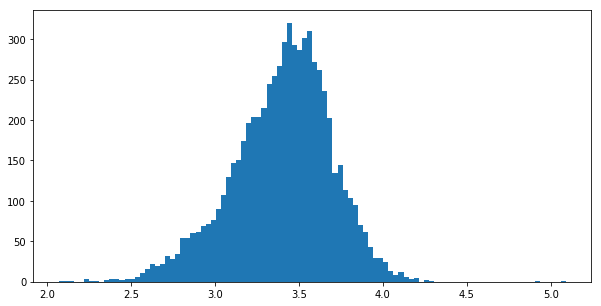

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5])
plt.hist(np.log10(length),bins=100)
plt.show()

In [65]:
codebook = pd.DataFrame(gname,columns=['Gene'])
codebook['Transcript_ID'] = tid
codebook['Barcode'] = '1111'.zfill(18)
codebook.head()

,Gene,Transcript_ID,Barcode
0,Gm1992,ENSMUST00000161581,000000000000001111
1,Sox17,ENSMUST00000116652,000000000000001111
2,Atp6v1h,ENSMUST00000044369,000000000000001111
3,Rb1cc1,ENSMUST00000159530,000000000000001111
4,Pcmtd1,ENSMUST00000182114,000000000000001111


In [66]:
f = '/bigstore/binfo/mouse/disulfide_readouts.fasta'
from Bio import SeqIO
readout_names = []
with open(f) as fasta_file:  # Will close handle cleanly
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        readout_names.append(seq_record.name)
print(readout_names)

def write_codebook(rows, fname, readout_names, codebook_style = '148MHD4'):
    with open(fname, 'w') as f:
        f.write('version'+','+str(1)+'\n')
        f.write('codebook_name'+','+codebook_style+'\n')
        f.write('bit_names,'+','.join(readout_names)+'\n')
        f.write('name, id, barcode\n')
        for row in rows:
            f.write(','.join([str(row[0]), str(row[1]), str(row[2])+'\n']))
# Generate Codebook
row_tuples = []

for idx, row in codebook.iterrows():
    if len(row['Transcript_ID'].split('.')[0])>0:
#         row_tuples.append((row['Gene'], row['Transcript_ID'].split('-')[1].split('.')[0], str('111000000000000001').zfill(18)))
        row_tuples.append((row['Gene'], row['Transcript_ID'], str(row['Barcode']).zfill(18)))
if not os.path.exists('/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/DRedFISH'):
    os.mkdir('/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/DRedFISH')
write_codebook(row_tuples, '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/DRedFISH/DRedFISH_Codebook_V2.txt', readout_names)
row_tuples

['RS0095', 'RS0109', 'RS0175', 'RS0237', 'RS0307', 'RS0332', 'RS0384', 'RS0406', 'RS0451', 'RS0468', 'RS0548', 'RS64.0', 'RS156.0', 'RS278.0', 'RS313.0', 'RS643.0', 'RS740.0', 'RS810.0']


[('Gm1992', 'ENSMUST00000161581', '000000000000001111'),
 ('Sox17', 'ENSMUST00000116652', '000000000000001111'),
 ('Atp6v1h', 'ENSMUST00000044369', '000000000000001111'),
 ('Rb1cc1', 'ENSMUST00000159530', '000000000000001111'),
 ('Pcmtd1', 'ENSMUST00000182114', '000000000000001111'),
 ('Gm26901', 'ENSMUST00000193732', '000000000000001111'),
 ('Vcpip1', 'ENSMUST00000057438', '000000000000001111'),
 ('Sgk3', 'ENSMUST00000171265', '000000000000001111'),
 ('Mcmdc2', 'ENSMUST00000052843', '000000000000001111'),
 ('Cops5', 'ENSMUST00000027050', '000000000000001111'),
 ('Cspp1', 'ENSMUST00000186294', '000000000000001111'),
 ('Arfgef1', 'ENSMUST00000131556', '000000000000001111'),
 ('Cpa6', 'ENSMUST00000035577', '000000000000001111'),
 ('Sulf1', 'ENSMUST00000088585', '000000000000001111'),
 ('Tram1', 'ENSMUST00000027068', '000000000000001111'),
 ('Eya1', 'ENSMUST00000080664', '000000000000001111'),
 ('Stau2', 'ENSMUST00000027052', '000000000000001111'),
 ('Ube2w', 'ENSMUST00000182554', '000000

In [67]:
fpkm = pd.read_csv(os.path.join(resource_path,'empty_expression.csv'))
fpkm

,transcript_id,class_code,nearest_ref_id,gene_id,gene_short_name,tss_id,locus,length,coverage,FPKM,FPKM_conf_lo,FPKM_conf_hi,FPKM_status
0,ENSMUST00000193812,-,-,4933401J01Rik,4933401J01Rik,-,-,1070,1,1,1,1,OK
1,ENSMUST00000082908,-,-,Gm26206,Gm26206,-,-,110,1,1,1,1,OK
2,ENSMUST00000162897,-,-,Xkr4,Xkr4,-,-,4153,1,1,1,1,OK
3,ENSMUST00000159265,-,-,Xkr4,Xkr4,-,-,2989,1,1,1,1,OK
4,ENSMUST00000070533,-,-,Xkr4,Xkr4,-,-,3634,1,1,1,1,OK
5,ENSMUST00000192857,-,-,Gm18956,Gm18956,-,-,480,1,1,1,1,OK
6,ENSMUST00000195335,-,-,Gm37180,Gm37180,-,-,2819,1,1,1,1,OK
7,ENSMUST00000192336,-,-,Gm37363,Gm37363,-,-,2233,1,1,1,1,OK
8,ENSMUST00000194099,-,-,Gm37686,Gm37686,-,-,2309,1,1,1,1,OK
9,ENSMUST00000161581,-,-,Gm1992,Gm1992,-,-,250,1,1,1,1,OK


In [89]:
# Parse Fasta
f = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/DRedFISH/V2/DRedFISH_possible_oligos.fasta'
from Bio import SeqIO
with open(f) as fasta_file:  # Will close handle cleanly
    gene = []
    tid = []
    seqs = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        name = seq_record.description.split(' ')
        seqs.append(str(seq_record.seq))
#         for i in name:
#             if 'ENS' in i:
#                 gene.append(i.split('_')[0])
#                 gid.append(i.split('_')[2])
        des = ''
        for i in seq_record.description.split(' '):
            if len(i)>len(des):
                des=i
        gene.append(des.split('__')[0])
        tid.append(des.split('__')[1])
fasta = pd.DataFrame(columns = ['gene','transcript_ID','sequence'])
fasta['gene'] = gene
fasta['transcript_ID'] = tid
fasta['sequence'] = seqs
fasta

,gene,transcript_ID,sequence
0,Gm1992,ENSMUST00000161581,GAGTGTGTGTTAAGGTAGGTAGGAGTAGGTTGATGTGTAGTACACC...
1,Gm1992,ENSMUST00000161581,GGTTAGTAGGTTGTGGTGTTAGGAGTAGGTTGATGTGTAGTACAAT...
2,Gm1992,ENSMUST00000161581,GTATAAGGTGATTGGTGGTGAAATGCCATCCAGGCAAAGCCGTTAG...
3,Gm1992,ENSMUST00000161581,GGAGTAGGTTGATGTGTAGTAGGTTAGTAGGTTGTGGTGTTAAACA...
4,Gm1992,ENSMUST00000161581,GAGTGTGTGTTAAGGTAGGTAGGTTAGTAGGTTGTGGTGTTACTTA...
5,Sox17,ENSMUST00000116652,GGTTAGTAGGTTGTGGTGTTAGCTCACTAGATCTAACTTCTGCTGA...
6,Sox17,ENSMUST00000116652,GTATAAGGTGATTGGTGGTGAGCTGGCGCCAAGACCTCTTGGGGAA...
7,Sox17,ENSMUST00000116652,GGTTAGTAGGTTGTGGTGTTAGTATAAGGTGATTGGTGGTGAAGCT...
8,Sox17,ENSMUST00000116652,GAGTGTGTGTTAAGGTAGGTAGGAGTAGGTTGATGTGTAGTAGCAG...
9,Sox17,ENSMUST00000116652,GAGTGTGTGTTAAGGTAGGTAATAGTGGGGGCCCATGTGCGGAGAC...


In [90]:
probe_counts = Counter(fasta['gene'])
not_found = [gene for gene in codebook['Gene'] if not gene in probe_counts.keys()]
print(len(not_found))

9


In [96]:
n_probes = Counter(fasta.gene)
n_probes_sorted = np.zeros(len(dredfish_genes))
for gene,counts in Counter(fasta.gene).items():
    n_probes_sorted[np.where(dredfish_genes==gene)] = counts

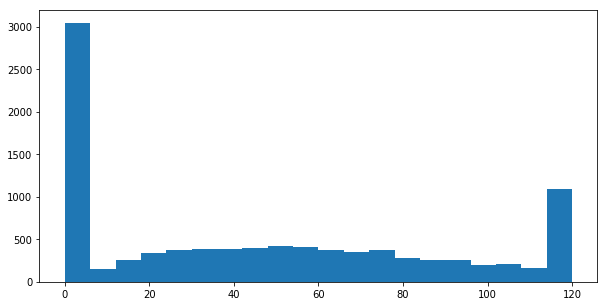

In [97]:
plt.figure(figsize=[10,5])
plt.hist(n_probes_sorted,bins=20)
plt.show()

(346,)


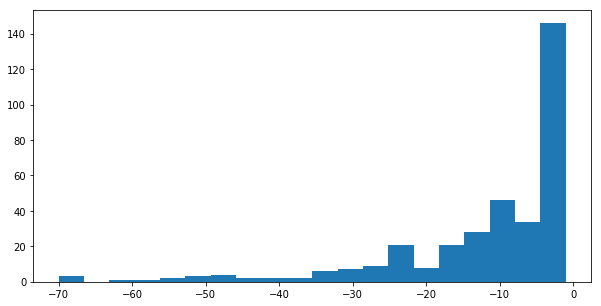

In [121]:
probes_per_gene = np.max(probes,axis=0)
probe_difference = n_probes_sorted-probes_per_gene
print(np.where(probe_difference<0)[0].shape)
probe_difference[np.where(probe_difference<0)[0]]
plt.figure(figsize=[10,5])
plt.hist(probe_difference[np.where(probe_difference<0)[0]],bins=20)
plt.show()

In [ ]:
""" Need to check if changing these loadings will be an issue"""

In [131]:
temp_probes = np.max(probes,axis=0)
temp_probes[np.where(probe_difference<0)[0]] = n_probes_sorted[np.where(probe_difference<0)[0]]

In [132]:
np.sum(temp_probes)/np.sum(probes)

0.9063151456141008

In [125]:
probes.shape[1]

9711

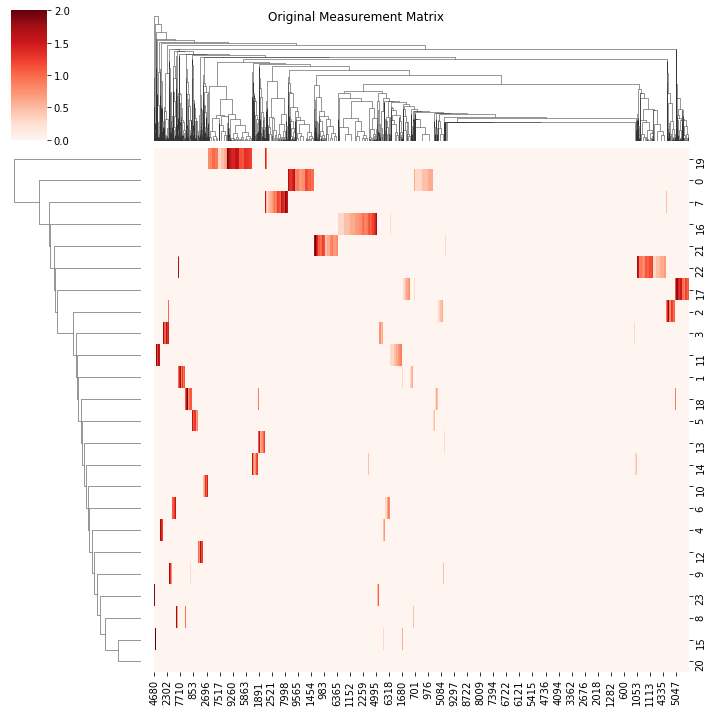

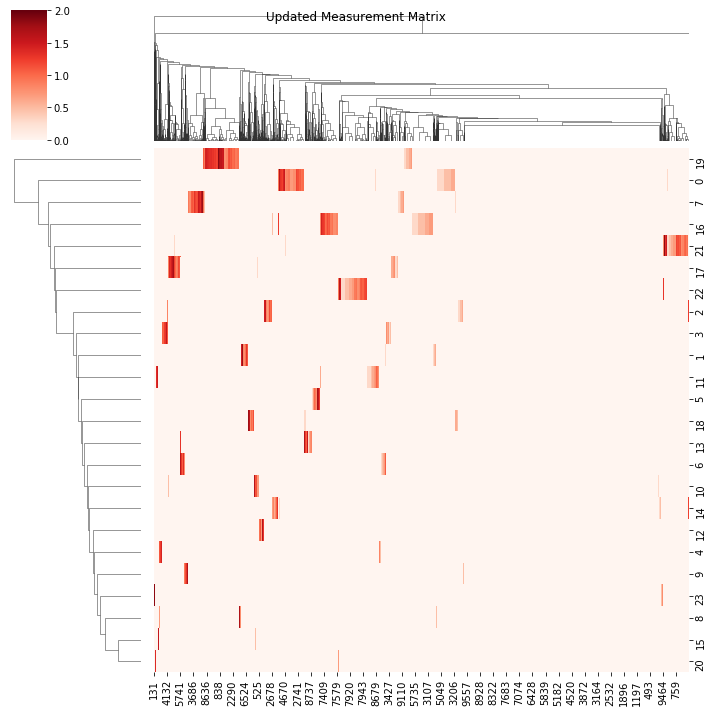

In [127]:
"""Updated probes matrix"""
temp_probe_matrix = probes.copy()
for i in range(probes.shape[0]):
    temp_probe_matrix[i,:] = n_probes_sorted
updated_probes = probes.copy()
updated_probes[updated_probes>temp_probe_matrix] = temp_probe_matrix[updated_probes>temp_probe_matrix]
g = sns.clustermap(np.log10(probes+1),cmap="Reds")
g.fig.suptitle('Original Measurement Matrix')
g
plt.show()
g = sns.clustermap(np.log10(updated_probes+1),cmap="Reds")
g.fig.suptitle('Updated Measurement Matrix')
g
plt.show()

In [128]:
np.save('/bigstore/binfo/mouse/Brain/Sequencing/Allen_10X_SmartSeqTypes/Updated_probes.npy',updated_probes)

In [129]:
probes.shape

(24, 9711)

In [130]:
np.sum(np.max(probes,axis=0)>0)

6295

In [135]:
np.sum(np.max(updated_probes,axis=0)-np.max(probes,axis=0))

-6641